In [1]:
import pandas as pd
import numpy as np
import scanpy.api as sc
from sklearn.decomposition import PCA
from quasildr.graphdr import graphdr
data = pd.read_csv('./data/other/hochgerner_2018.data.gz',sep='\t',index_col=0)
anno = pd.read_csv('./data/other/hochgerner_2018.anno',sep='\t',header=None)
adata = sc.AnnData(data.values.T, data.columns.values,data.index.values)
adata.var_names_make_unique()
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.scale(adata)
sc.tl.pca(adata)

/mnt/home/jzhou/anaconda2/envs/drgraph/lib/python3.7/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
pca50 = PCA(50).fit_transform(adata.X)
pca50 = pca50/pca50[:,0].std()
dr = graphdr(pca50, n_neighbors=15,_lambda=10, refine_threshold=10,refine_iter=6, no_rotation=True,rescale=True)


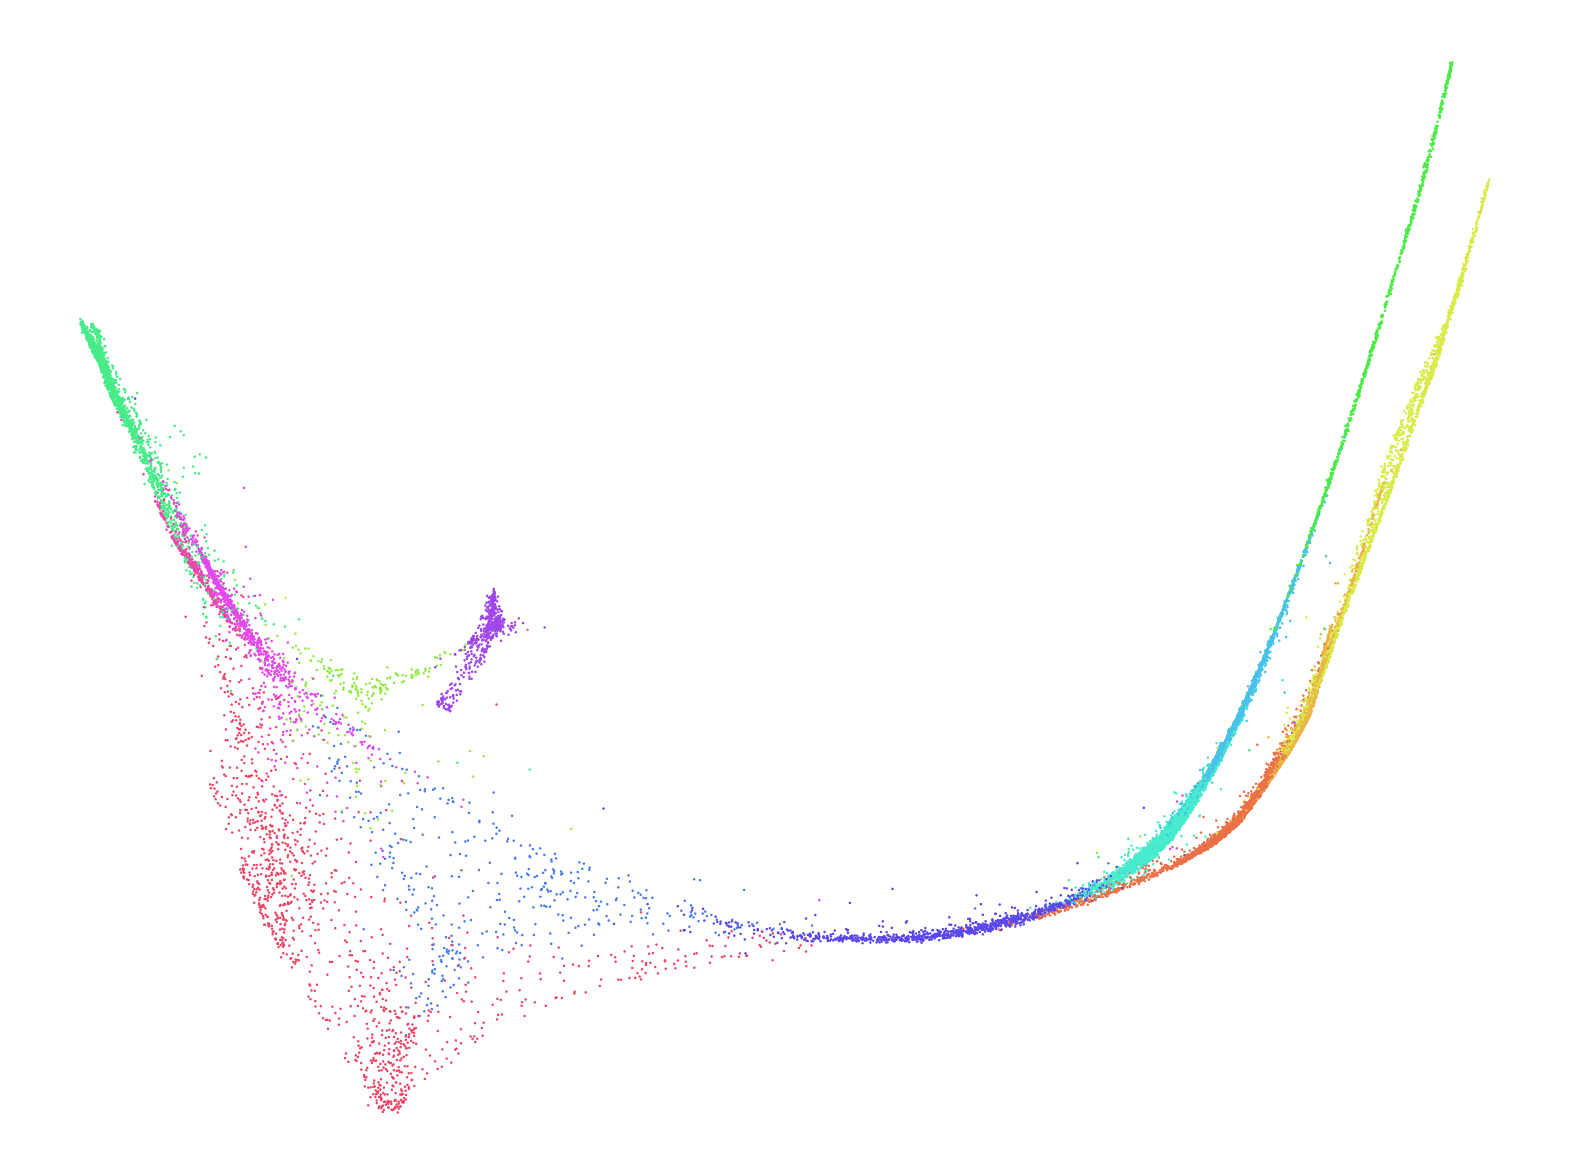

<ggplot: (-9223369104656071778)>

In [3]:
#Hochgerner et al. 2018 GraphDR
import plotnine
plotnine.options.figure_size=(20,15)
from plotnine import *
import warnings
warnings.simplefilter("ignore")

p = ggplot(pd.DataFrame({'x':-dr[:,0], 'y':dr[:,1], 'c': anno.iloc[:,1]}))+geom_point(aes(x='x', y='y', color='c'),size=0.01, alpha=1)+ guides(color=False)+  theme_void()+scale_color_hue(l=0.6,h=15/360,s=0.8)
p.save('./figures/hochgerner_2018.graphdr.pdf', width=12, height=10.5)
p

In [4]:
#Plot PCA
p = ggplot(pd.DataFrame({'x':-pca50[:,0], 'y':pca50[:,1], 'c': anno.iloc[:,1]}))+geom_point(aes(x='x', y='y', color='c'),size=0.01)+ guides(color=False)+  theme_void()+scale_color_hue(l=0.6,h=15/360,s=0.8)
p.save('./figures/hochgerner_2018.pca.pdf', width=8, height=7)


In [5]:
#Plot tSNE
np.random.seed(0)
sc.tl.tsne(adata)
p = ggplot(pd.DataFrame({'x': adata.obsm['X_tsne'][:,0], 'y': adata.obsm['X_tsne'][:,1], 'c': anno.iloc[:,1]}))+geom_point(aes(x='x', y='y', color='c'),size=0.01)+ guides(color=False)+  theme_void()+scale_color_hue(l=0.6,h=15/360,s=0.8)
p.save('./figures/hochgerner_2018.tsne.pdf', width=8, height=7)


In [6]:
#Zeisel et al. 2018 GraphDR
import loompy
ds = loompy.connect('./data/other/zeisel_2018.data.loom')
data = pd.DataFrame(ds[:,:],index= ds.row_attrs['Gene'],columns=ds.col_attrs['CellID'])
adata = sc.AnnData(data.values.T,  ds.col_attrs['CellID'],ds.row_attrs['Gene'])
adata.var_names_make_unique()
sc.pp.recipe_zheng17(adata)
sc.pp.pca(adata)
sc.tl.tsne(adata)


In [7]:
pca50 = PCA(50).fit_transform(adata.X)
pca50 = pca50/pca50[:,0].std()


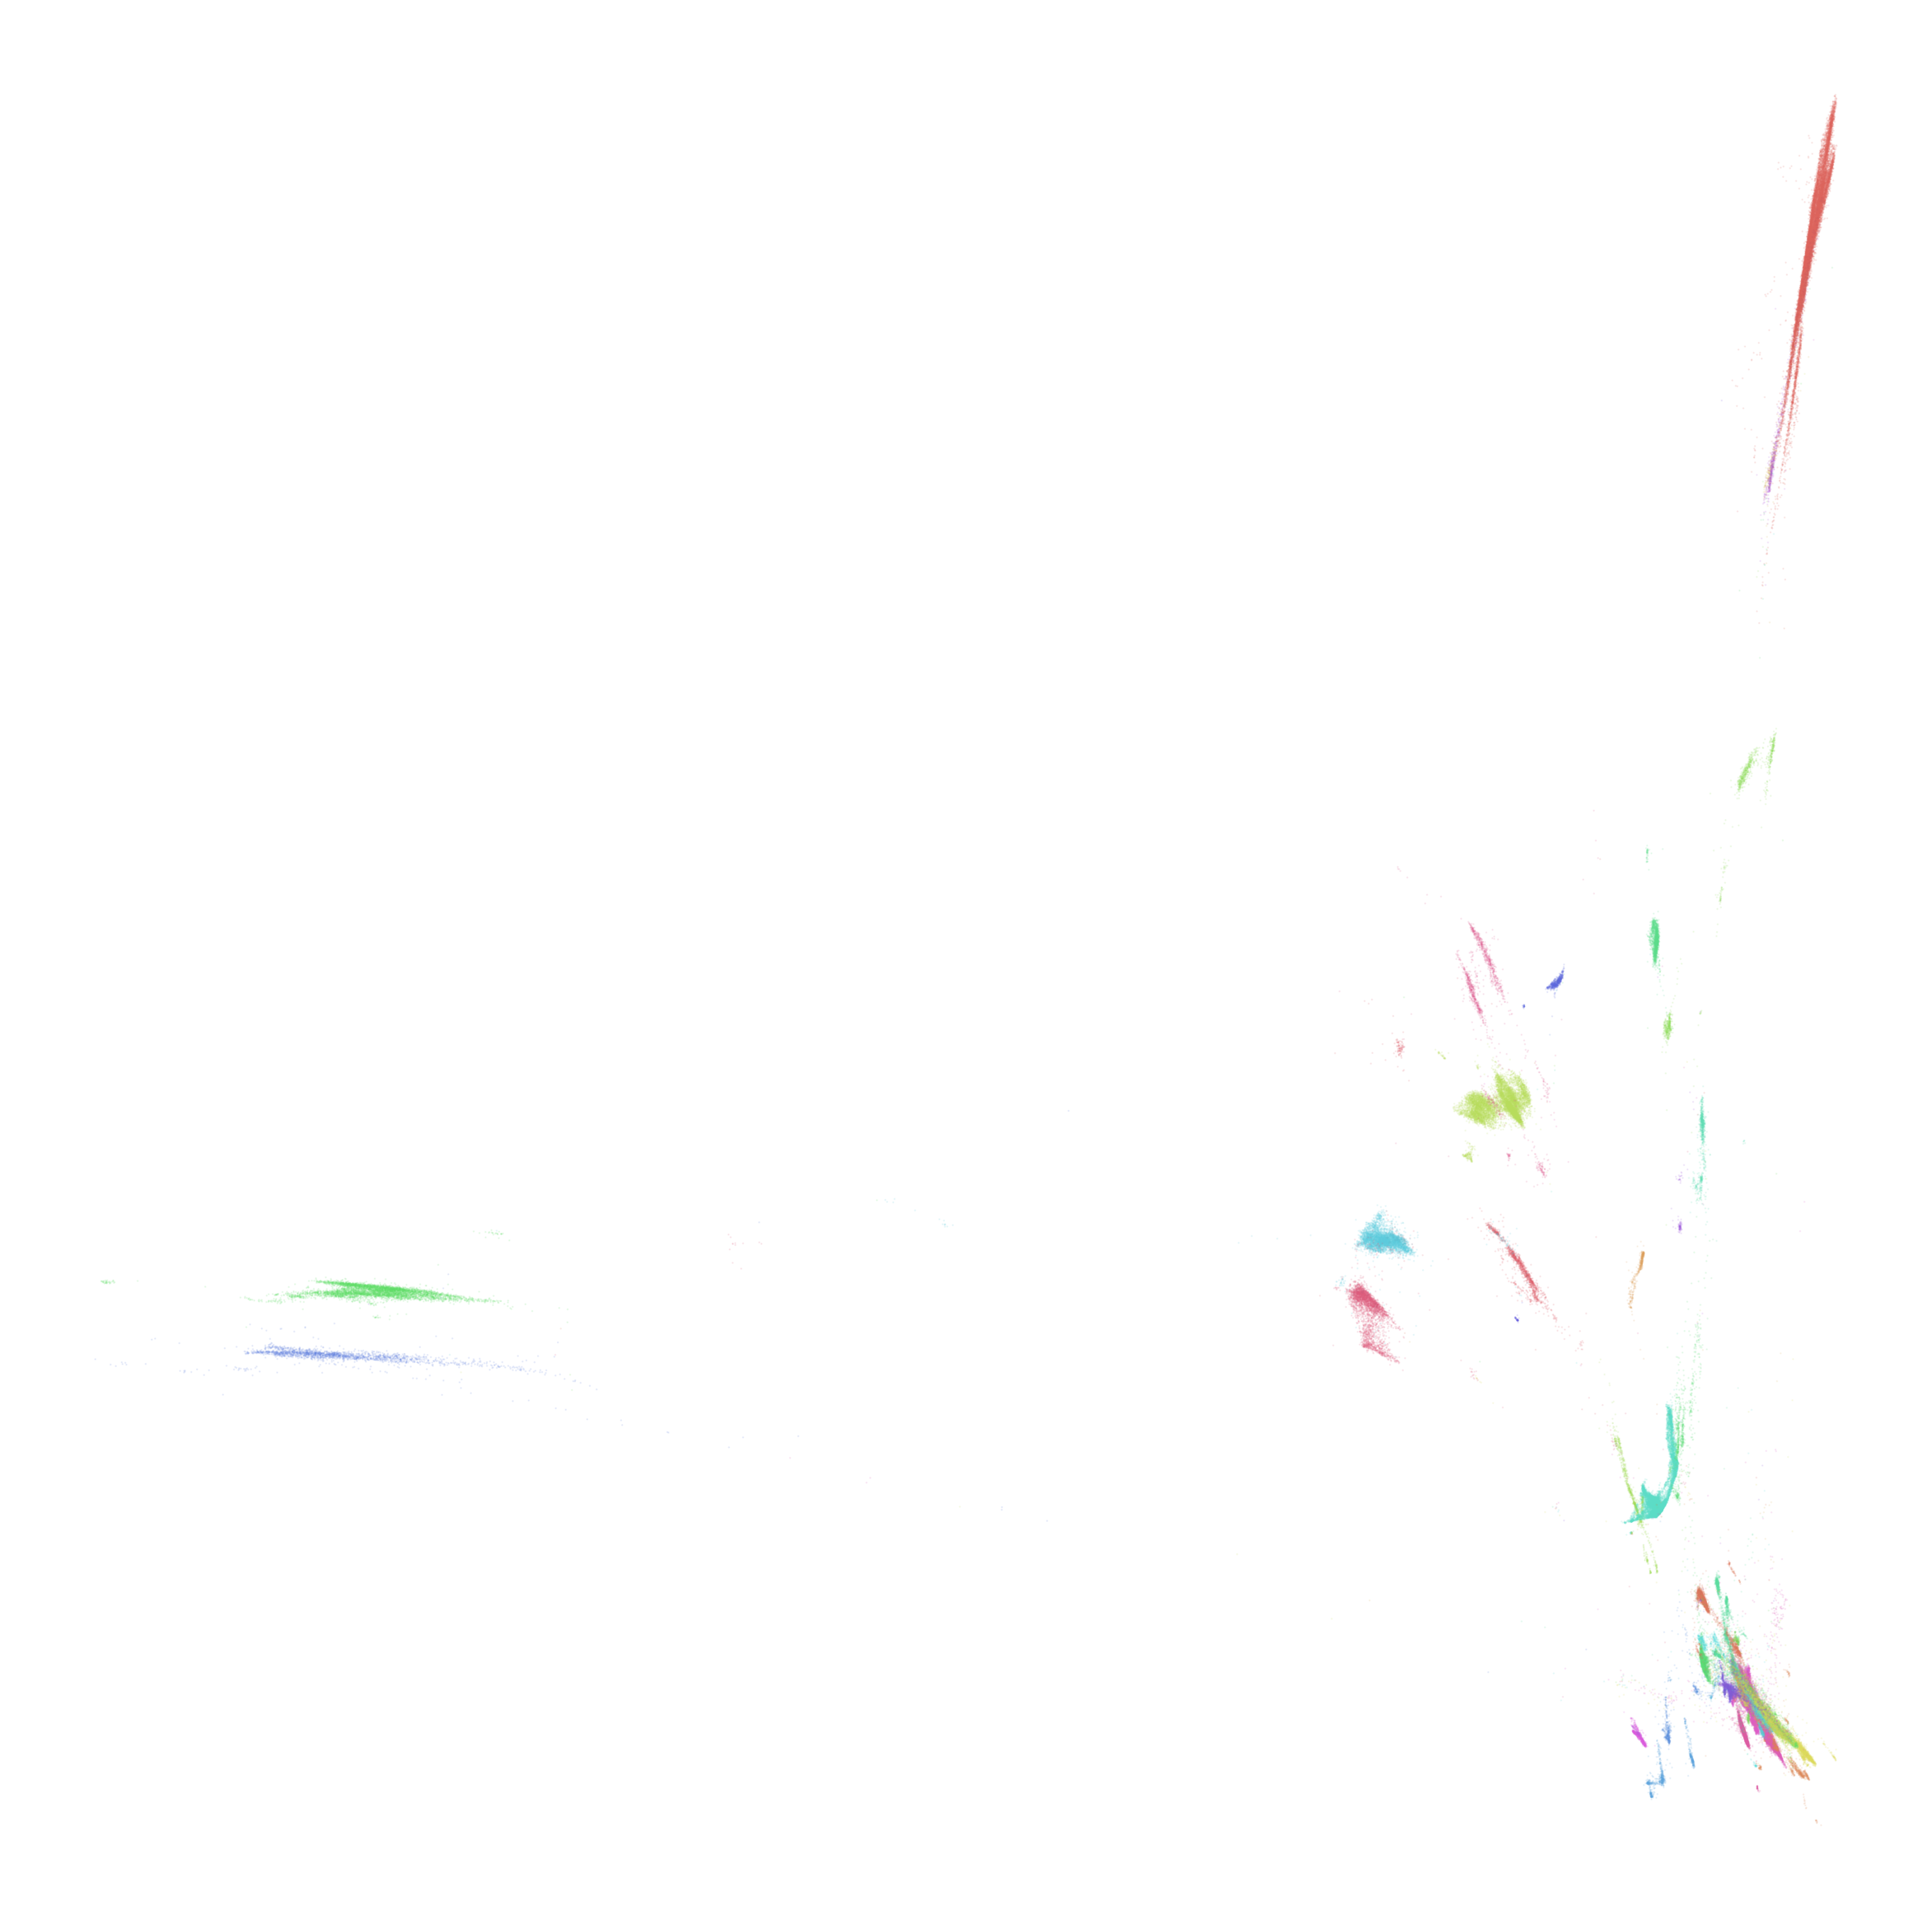

<ggplot: (-9223369104650864780)>

In [8]:
anno = pd.read_csv('./data/other/zeisel_2018.anno',sep='\t',header=None)
dr = graphdr(pca50, n_neighbors=10,_lambda=10, refine_threshold=4,refine_iter=2, no_rotation=True,rescale=True)

import plotnine
plotnine.options.figure_size=(30,30)

p = ggplot(pd.DataFrame({'x':-dr[:,0], 'y':dr[:,1], 'c': anno.iloc[:,1]}))+geom_point(aes(x='x', y='y', color='c'),size=0.01, alpha=0.1)+ guides(color=False)+  theme_void()
p.save('./figures/zeisel_2018.graphdr.pdf', width=16, height=14)
p

In [9]:
#Plot PCA
p = ggplot(pd.DataFrame({'x':-pca50[:,0], 'y':pca50[:,1], 'c': anno.iloc[:,1]}))+geom_point(aes(x='x', y='y', color='c'),size=0.01)+ guides(color=False)+  theme_void()
p.save('./figures/zeisel_2018.pca.pdf', width=16, height=14)


In [10]:
#Plot tSNE
np.random.seed(0)
sc.tl.tsne(adata)
p = ggplot(pd.DataFrame({'x': adata.obsm['X_tsne'][:,0], 'y': adata.obsm['X_tsne'][:,1], 'c': anno.iloc[:,1]}))+geom_point(aes(x='x', y='y', color='c'),size=0.01)+ guides(color=False)+  theme_void()
p.save('./figures/zeisel_2018.tsne.pdf', width=16, height=14)
